In [3]:
import pyod
from pyod.models.knn import KNN

import matplotlib.pyplot as pyplot
import sklearn.metrics as sk

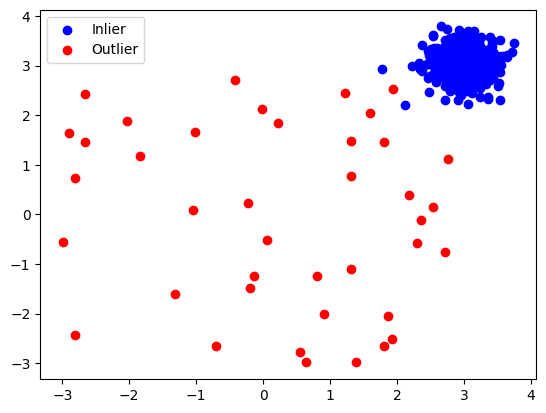

In [4]:
### EXERCISE 1
dataset = pyod.utils.data.generate_data(
    n_train=400, n_test=100, n_features=2, contamination=0.1
)

X_train, X_test, y_train, y_test = dataset

inliers = y_train == 0
outliers = y_train == 1

pyplot.scatter(
    X_train[inliers][:, 0], X_train[inliers][:, 1], c="b", label="Inlier"
)
pyplot.scatter(
    X_train[outliers][:, 0],
    X_train[outliers][:, 1],
    c="r",
    label="Outlier",
)
pyplot.legend()
pyplot.show()

In [5]:
### EXERCISE 2
model = KNN(contamination=0.5)

model.fit(X_train)

y_test_pred = model.predict(X_test)

matrix = sk.confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[51 39]
 [ 0 10]]


Balanced Accuracy: 0.7833333333333333


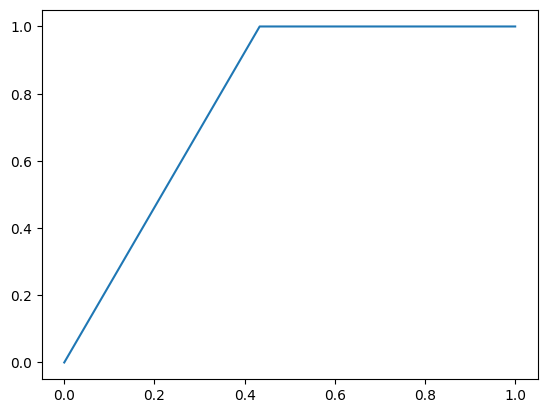

In [6]:
tpr = matrix[0,0] / (matrix[0,0] + matrix[0,1])
tnr = matrix[1,1] / (matrix[1,0] + matrix[1,1])

ba = 0.5 * (tpr + tnr)

print(f"Balanced Accuracy: {ba}")

pyplot.plot(sk.roc_curve(y_test, y_test_pred)[0], sk.roc_curve(y_test, y_test_pred)[1])